<a href="https://colab.research.google.com/github/SLaksh/Python/blob/main/MBA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
from google.colab import files
uploaded = files.upload()



Saving Groceries_dataset.csv to Groceries_dataset.csv


In [ ]:
groceries = pd.read_csv("/content/Groceries_dataset.csv")
groceries.shape
(38765, 3)
groceries.head()

,Member_number,Date,itemDescription
0,1808,21-07-2015,tropical fruit
1,2552,05-01-2015,whole milk
2,2300,19-09-2015,pip fruit
3,1187,12-12-2015,other vegetables
4,3037,01-02-2015,whole milk


In [ ]:
type(groceries)


pandas.core.frame.DataFrame

**Checking for the missing values in the data types**

In [ ]:
groceries.isna().sum().sum()

0

**Checking for the Data types**

In [ ]:
groceries.dtypes

Member_number       int64
Date               object
itemDescription    object
dtype: object

**There is no missing value but the data type of “Date” column should be converted to datetime which can be done with the to_datetime function of pandas**.

In [ ]:
groceries.Date = pd.to_datetime(groceries.Date)

**Checking for the average number of Items sold per day with GROUPBY **

Text(0, 0.5, 'Qty')

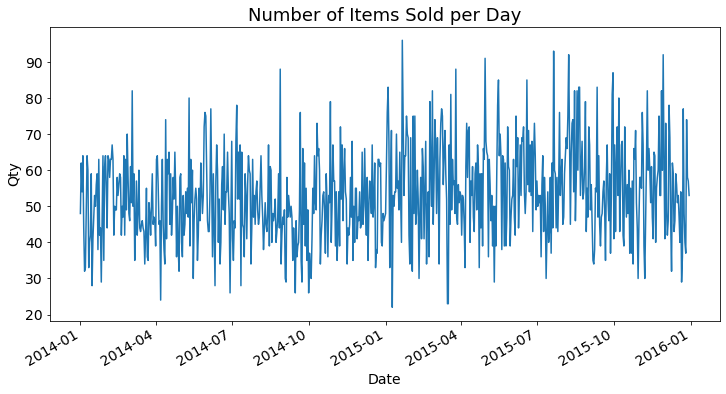

In [ ]:
import matplotlib.pyplot as plt
groceries[['Date','itemDescription']].groupby('Date').count()\
.plot(figsize=(12,6), legend=False, fontsize=14)
plt.title('Number of Items Sold per Day', fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Qty', fontsize=14)

**Downsampling with RESAMPLE function**

Text(0, 0.5, 'Qty')

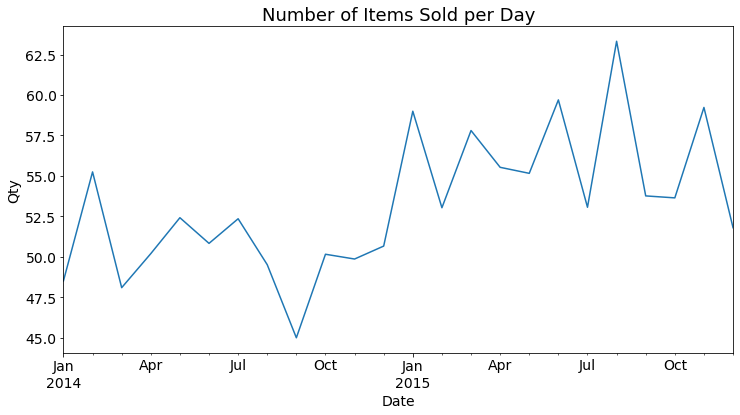

In [ ]:
groceries[['Date','itemDescription']].groupby('Date').count()\
.resample('M').mean()\
.plot(figsize=(12,6), legend=False, fontsize=14)
plt.title('Number of Items Sold per Day', fontsize=18)
plt.xlabel('Date',fontsize=14)
plt.ylabel('Qty', fontsize=14)

**Grouping the Items by Customer Number and date**

In [ ]:
item_qty = groceries[['Member_number', 'Date','itemDescription']]\
.groupby(['Member_number','Date']).count().reset_index()
item_qty.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,3
1,1000,2015-03-15,4
2,1000,2015-05-27,2
3,1000,2015-07-24,2
4,1000,2015-11-25,2


**The average item per shopping**

In [ ]:
item_qty.itemDescription.mean()

2.590723785337165

**The distribution of the number of items per shopping**

Text(0.5, 1.0, 'Histogram of Item Quantities per Shopping')

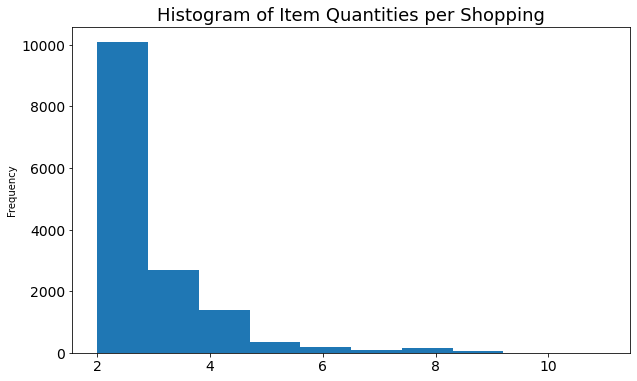

In [ ]:
item_qty.itemDescription.plot(figsize=(10,6), kind='hist',
                              legend=False, fontsize=14)
plt.title('Histogram of Item Quantities per Shopping', fontsize=18)

# **MARKET BASKET ANALYSIS**

** First we create a dataframe that contains the items list per shopping**

In [ ]:
items = groceries.groupby(['Member_number', 'Date'])\
.agg({'itemDescription': lambda x: x.ravel().tolist()}).reset_index()
items.head()

,Member_number,Date,itemDescription
0,1000,2014-06-24,"[whole milk, pastry, salty snack]"
1,1000,2015-03-15,"[sausage, whole milk, semi-finished bread, yog..."
2,1000,2015-05-27,"[soda, pickled vegetables]"
3,1000,2015-07-24,"[canned beer, misc. beverages]"
4,1000,2015-11-25,"[sausage, hygiene articles]"


In [ ]:
items.describe()

,Member_number
count,14963.000000
mean,3006.840807
std,1152.947471
min,1000.000000
25%,2005.000000
50%,3010.000000
75%,4015.000000
max,5000.000000


In [ ]:
df = groceries.copy()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38765 entries, 0 to 38764
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Member_number    38765 non-null  int64         
 1   Date             38765 non-null  datetime64[ns]
 2   itemDescription  38765 non-null  object        
dtypes: datetime64[ns](1), int64(1), object(1)
memory usage: 908.7+ KB


In [ ]:
Ser = df.groupby('Member_number').itemDescription.nunique()
Ser.describe()

count    3898.000000
mean        8.918933
std         4.403278
min         1.000000
25%         6.000000
50%         8.500000
75%        12.000000
max        26.000000
Name: itemDescription, dtype: float64

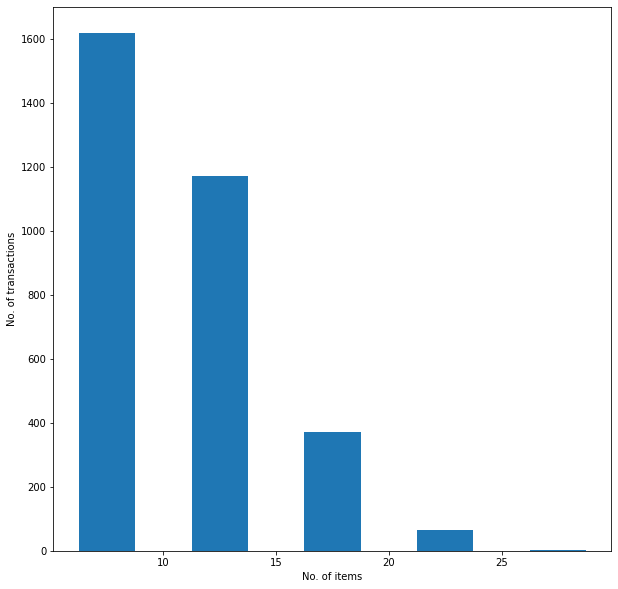

In [ ]:
bins = [5,10,15,20,25,30]
fig = plt.figure(figsize = (10,10))
plt.hist(Ser, bins, histtype = 'bar', rwidth = 0.5)
plt.xlabel('No. of items')
plt.ylabel('No. of transactions')
plt.show()

**Next, we have to determine which items frequently exist in the same rows in "ItemDescription"**

**One way is to create combinations of items in each row and count the occurrences of each combination. This can be done with the help of "itertools" of Python**

In [ ]:
import itertools
list(itertools.combinations(items.itemDescription[0], 2))

[('whole milk', 'pastry'),
 ('whole milk', 'salty snack'),
 ('pastry', 'salty snack')]

**As we have 3 items in the first item we get the above combinations**

**But, Itertools.combinations do not return repeated combinations (e.g. (‘pastry’, ‘pastry’)) which is what we need**

In [ ]:
combinations_list = []
for row in items.itemDescription:
    combinations = list(itertools.combinations(row, 2))
    combinations_list.append(combinations)

In [ ]:
combinations_list[:2]


[[('whole milk', 'pastry'),
  ('whole milk', 'salty snack'),
  ('pastry', 'salty snack')],
 [('sausage', 'whole milk'),
  ('sausage', 'semi-finished bread'),
  ('sausage', 'yogurt'),
  ('whole milk', 'semi-finished bread'),
  ('whole milk', 'yogurt'),
  ('semi-finished bread', 'yogurt')]]

**The above code is a LIst of List**

**We have to now convert it to a Series**

In [ ]:
combination_counts = pd.Series(combinations_list).explode().reset_index(drop=True)

In [ ]:
combination_counts[:5]

0              (whole milk, pastry)
1         (whole milk, salty snack)
2             (pastry, salty snack)
3             (sausage, whole milk)
4    (sausage, semi-finished bread)
dtype: object

**Now we count the combinations with the counts() function**

In [ ]:
combination_counts.value_counts()[:10]

(whole milk, whole milk)          148
(whole milk, rolls/buns)          143
(sausage, whole milk)             131
(other vegetables, whole milk)    130
(whole milk, soda)                128
(whole milk, yogurt)              126
(whole milk, other vegetables)    113
(other vegetables, rolls/buns)    112
(tropical fruit, whole milk)      101
(other vegetables, soda)           95
dtype: int64

In [ ]:
whole_milk = groceries[groceries.itemDescription == 'whole milk']\
.groupby(['Member_number','Date']).count()\
.sort_values(by='itemDescription', ascending=False).reset_index()
whole_milk.head()

,Member_number,Date,itemDescription
0,1994,2015-11-03,4
1,3518,2014-08-02,3
2,4843,2015-05-13,3
3,2736,2015-02-03,3
4,1370,2015-06-28,3
